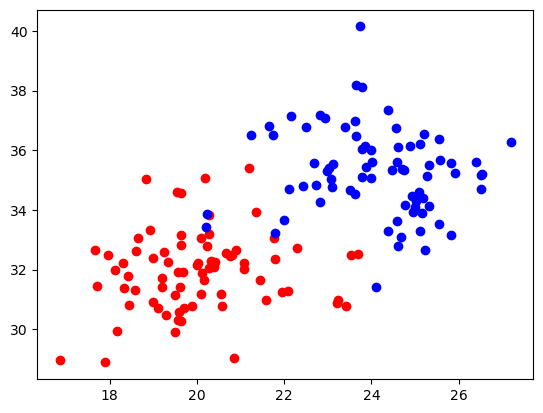

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datapoints.txt")
df.columns = df.columns.str.replace("(", "").str.replace(")", "").str.strip().str.replace(" ", "_").str.capitalize()
df["Pichu-0_pikachu-1"] = df["Label_0-pichu"]
df = df.drop(["Label_0-pichu", "1-pikachu"], axis = 1)


pikachu = df[df["Pichu-0_pikachu-1"] == 1]
pichu = df[df["Pichu-0_pikachu-1"] == 0]

plt.scatter(x = pichu["Width_cm"], y = pichu["Height_cm"], color = "red")
plt.scatter(x = pikachu["Width_cm"], y = pikachu["Height_cm"], color = "blue")
plt.show

test_list = []
with open("testpoints.txt", "r") as test_file:
    fil = test_file.readlines()
    for line in fil:
        test_list.append(line)

test_data = pd.DataFrame(test_list, columns= ["test_d"]) # omvandla listen till en dataframe
test_data = test_data.drop(0, axis = 0)                  # göra om data till lämplig struktur
test_data["Width_cm"] = test_data["test_d"].str.split("(").str.get(1).str.split(",").str.get(0)
test_data["Height_cm"] = test_data["test_d"].str.split(")").str.get(0).str.split(",").str.get(1)
test_data = test_data.drop("test_d", axis= 1)
test_data[["Height_cm", "Width_cm"]] = test_data[["Height_cm", "Width_cm"]].astype(float)

In [23]:
import numpy as np
def clasify_point(maj, data_x , data_y,pic_pika, wid, hei):
    points_distans =[(np.sqrt(np.power(x- wid, 2) + np.power(y- hei, 2))) 
                     for x, y in zip(data_x, data_y)]
    
    if maj == 1:

        min_value = min(points_distans)
        index_value = points_distans.index(min_value)
    
        if pic_pika[index_value] != 0:
            return 1
        else:
            return 0
    
    elif maj == 10:
        sort_values = sorted(points_distans)
        ten_values = sort_values[:10]
        index_lis_values = [points_distans.index(x) for x in ten_values]
        choose_maj = sum([pic_pika[x] for x in index_lis_values])

        if choose_maj > 5:
            return 1
        else:
            return 0
        
    else:
        print("Enter 1 or 10")
        
# köra test data med df som tränings data
for x , y in zip(test_data["Width_cm"], test_data["Height_cm"]):
    print(clasify_point(1, df["Width_cm"], df["Height_cm"], df["Pichu-0_pikachu-1"],x, y))

1
1
1
0


In [24]:
# om inmatade data är en picho eller pikacho   
while True:
    x_input = input("Enter your first positiv numbers.")
    y_input = input("Enter your second positiv numbers.")

    width = x_input # används för att kontrolera om ett number är negativ
    height = y_input

    x_input = x_input.replace(".", "").replace("-", "") # ta bort de karäktarer för att det skulle bli läsbar
    y_input = y_input.replace(".", "").replace("-", "")

    if x_input.isdigit() == False or y_input.isdigit() == False:
        print("You have entered a character which is not a number")
        print("You need to enter a number. ex: 23 or 34.23")
    
    width = float(width)
    height = float(height)

    if height > 0 and width > 0:
        print(clasify_point(1, df["Width_cm"], df["Height_cm"], df["Pichu-0_pikachu-1"], width, height))
        break
    elif height < 0 or width < 0:
        print("You have entered a negative number")
        print("Try again")



0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x = df[["Width_cm", "Height_cm"]] # features
y = df["Pichu-0_pikachu-1"] # label

x_train,y_train, x_test, y_test = train_test_split(x, y, random_state = 26, test_size = 0.333)

width_training = [x for x in x_train["Width_cm"]]
height_training = [x for x in x_train["Height_cm"]]
label_training= [x for x in x_test]
y_label = [x for x in y_test]

prediction = [(clasify_point(10, width_training, height_training, label_training, x, y)) 
                      for x, y in zip(y_train["Width_cm"], y_train["Height_cm"])]

con_accuraccy = confusion_matrix(prediction, y_label)
con_accuraccy



array([[25,  2],
       [ 1, 22]], dtype=int64)

In [ ]:
prediction = [(clasify_point(1, x_train["Width_cm"], x_train["Height_cm"], x_test, x, y)) 
                for x, y in zip(y_train["Width_cm"], y_train["Height_cm"])]

con_accuraccy = confusion_matrix(prediction, y_test)
con_accuraccy

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
x = df[["Width_cm", "Height_cm"]] # features
y = df["Pichu-0_pikachu-1"] # label
x_train,y_train, x_test, y_test = train_test_split(x, y, random_state = 26, test_size = 0.333) 


#predic = [(closest_point(x, y)) for x, y in zip(y_train["Width_cm"], y_train["Height_cm"])]
#con = confusion_matrix(predic, y_test)
x_train


,Width_cm,Height_cm
88,18.989418,30.905568
19,17.905129,28.888134
37,20.795122,32.493052
10,25.813563,35.561030
41,26.388368,35.620907
...,...,...
77,24.477962,35.321466
102,24.686621,33.104764
6,24.736457,35.332912
62,23.388323,36.770000


In [78]:
num = int("2335232342")
print(num)

2335232342


In [112]:
def closest_point(wid, hig):
    points_distans =[(np.sqrt(np.power(x- wid, 2) + np.power(y- hig, 2))) 
                     for x, y in zip(x_train["Width_cm"], x_train["Height_cm"])]
    
    min_value = min(points_distans)
    index_value = points_distans.index(min_value)
    
    if df.loc[index_value, "Pichu-0_pikachu-1"] == 0:
        return 0
    else:
        return 1
        



In [ ]:
import numpy as np

# skapa en list sedan sorter listen från minsta till största sedan välja 10 närmast pukter
def pichu_piaka(wid, hig):
    df
    points_distans =[(np.sqrt(np.power(df.loc[x, "Width_cm"]- wid, 2) + np.power(df.loc[x, "Height_cm"]- hig, 2))) 
                     for x in range(len(df))]
    
    min_value = min(points_distans)
    index_value = points_distans.index(min_value)
    
    if df.loc[index_value, "Pichu-0_pikachu-1"] == 0:
        return "Picho"
    else:
        return"Pikachu"
    


for x , y in zip(test_data["Width_cm"], test_data["Height_cm"]):
    print(pichu_piaka(x, y))

Pikachu
Pikachu
Pikachu
Picho


In [ ]:
distan_pichu = []
for x in range(len(df)):
    distan_pichu.append(np.sqrt(np.power(df.loc[x, "Width_cm"]- 23, 2) + np.power(df.loc[x, "Height_cm"]-28.3232, 2)))

lis =[(np.sqrt(np.power(df.loc[x, "Width_cm"]- 23, 2) + np.power(df.loc[x, "Height_cm"]-28.3232, 2)))for x in range(len(df))]

In [19]:
lis = []
with open("testpoints.txt", "r") as file:
    dd = file.readlines()
    lis = [x for x in dd ]

des = int(lis.)
       


['Test points:\n',
 '1. (25, 32)\n',
 '2. (24.2, 31.5)\n',
 '3. (22, 34)\n',
 '4. (20.5, 34)\n']